### Imports 

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import re

##### 1. Chargement des données

In [85]:
df = pd.read_csv('./Data/houses_Madrid.csv')

##### 2. Aperçu des premières lignes du dataset ainsi que des informations générales le concernant.

In [86]:
df.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [88]:
df.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,...,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,...,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,...,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,...,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,...,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,...,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,...,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


##### 3. Gestion des valeurs manquantes.

La gestion des valeurs manquantes est importante dans la préparation des données.  
Elles peuvent être gérée par imputation, qui consiste a remplacer les valeurs manquantes ou pas suppression. Ce choix va se faire en fonction de la quantité de valeurs manquantes ainsi que de l'importance de la colonne. 

Dans un premier temps, on calcule les pourcentages de valeurs manquantes par colonne.

In [89]:
missing_values = df.isnull().mean() * 100
print(missing_values[missing_values > 0])

sq_mt_built                       0.579524
sq_mt_useful                     62.156195
n_bathrooms                       0.073590
n_floors                         93.390672
sq_mt_allotment                  93.413669
latitude                        100.000000
longitude                       100.000000
raw_address                      25.135682
street_name                      27.159415
street_number                    71.023825
portal                          100.000000
floor                            11.990617
is_floor_under                    5.381290
door                            100.000000
rent_price_by_area              100.000000
house_type_id                     1.798363
is_new_development                4.562598
built_year                       54.006071
has_central_heating              37.411462
has_individual_heating           37.411462
are_pets_allowed                100.000000
has_ac                           48.436206
has_fitted_wardrobes             38.372735
has_lift   

Puis, on impute les valeurs manquantes dans les colonnes importantes.

In [90]:
df_cleaned = df.copy()

df_cleaned['sq_mt_built'].fillna(df_cleaned['sq_mt_built'].median(), inplace=True)
df_cleaned['sq_mt_useful'].fillna(df_cleaned['sq_mt_built'] * 0.8, inplace=True)
df_cleaned['built_year'].fillna(df_cleaned['built_year'].median(), inplace=True)
df_cleaned['n_bathrooms'].fillna(df_cleaned['n_bathrooms'].mode()[0], inplace=True)
df_cleaned[['has_central_heating', 'has_individual_heating']] = df_cleaned[['has_central_heating', 'has_individual_heating']].fillna(0)
df_cleaned['floor'].fillna(1, inplace=True)

equipment_columns = ['has_pool', 'has_terrace', 'is_furnished', 'has_garden', 'has_storage_room', 'has_balcony', 'has_lift', 'has_ac']

df_cleaned[equipment_columns] = df_cleaned[equipment_columns].fillna(0)




C:\Users\aurel\AppData\Local\Temp\ipykernel_24992\1987574240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['sq_mt_built'].fillna(df_cleaned['sq_mt_built'].median(), inplace=True)
C:\Users\aurel\AppData\Local\Temp\ipykernel_24992\1987574240.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Pour terminer, on supprime les colonnes qui ont plus de 40% de valeurs manquantes et/ou qui ne sont pas importantes.

In [91]:
columns_to_drop = missing_values[missing_values > 40].index
columns_to_drop_additional = ['raw_address', 'street_name', 'is_floor_under']

df_cleaned = df_cleaned.drop(columns=columns_to_drop)
df_cleaned = df_cleaned.drop(columns=columns_to_drop_additional)

print(df_cleaned.isnull().sum())

Unnamed: 0                    0
id                            0
title                         0
subtitle                      0
sq_mt_built                   0
n_rooms                       0
n_bathrooms                   0
is_exact_address_hidden       0
floor                         0
neighborhood_id               0
operation                     0
rent_price                    0
is_rent_price_known           0
buy_price                     0
buy_price_by_area             0
is_buy_price_known            0
house_type_id               391
is_renewal_needed             0
is_new_development          992
has_central_heating           0
has_individual_heating        0
has_fitted_wardrobes       8343
has_lift                      0
is_exterior                3043
energy_certificate            0
has_parking                   0
dtype: int64


##### 4. Gestion des doublons

In [92]:
duplicates = df_cleaned.duplicated(subset=['id'])
df_cleaned = df_cleaned[~duplicates]

##### 5. Traitement des valeurs aberrantes

On visualise d'abord les outliers sur les colonnes critiques.

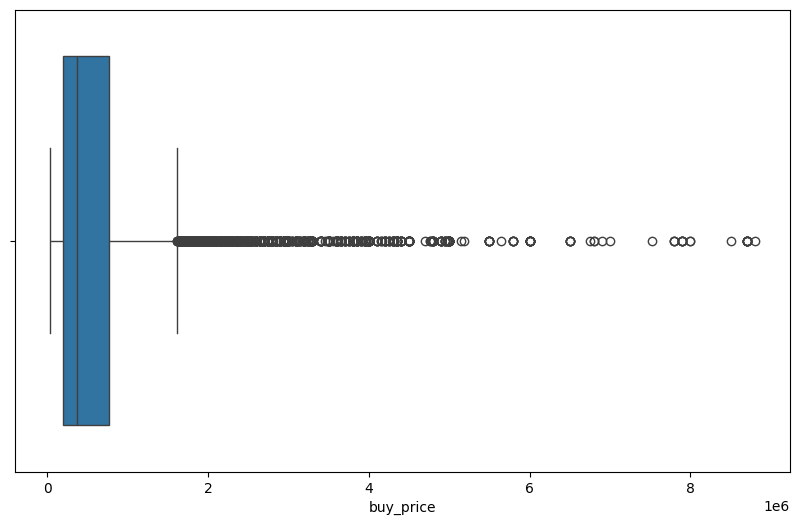

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['buy_price'])
plt.show()

On supprime les valeurs aberrantes dans les prix d'achat.

In [94]:
Q1 = df_cleaned['buy_price'].quantile(0.25)
Q3 = df_cleaned['buy_price'].quantile(0.75)
IQR = Q3 - Q1

On garde les données dans l'intervalle [Q1 - 1.5*IQR, Q3 + 1.5*IQR]

In [95]:
df_cleaned = df_cleaned[(df_cleaned['buy_price'] >= Q1 - 1.5 * IQR) & (df_cleaned['buy_price'] <= Q3 + 1.5 * IQR)]

##### 6. Normalisation / Standardisation

Certaines colonnes peuvent avoir des échelles différentes, ce qui peut poser problème pour certains algorithmes de machine learning. Une normalisation ou une standardisation peut être nécessaire.

In [96]:
print(df_cleaned.isnull().sum())

Unnamed: 0                    0
id                            0
title                         0
subtitle                      0
sq_mt_built                   0
n_rooms                       0
n_bathrooms                   0
is_exact_address_hidden       0
floor                         0
neighborhood_id               0
operation                     0
rent_price                    0
is_rent_price_known           0
buy_price                     0
buy_price_by_area             0
is_buy_price_known            0
house_type_id               389
is_renewal_needed             0
is_new_development          941
has_central_heating           0
has_individual_heating        0
has_fitted_wardrobes       7741
has_lift                      0
is_exterior                2174
energy_certificate            0
has_parking                   0
dtype: int64


In [97]:
def extract_price_per_sq_m(text):
    if pd.isna(text):
        return None
    # Utilisation d'une expression régulière pour extraire les chiffres et le point décimal entre parenthèses
    match = re.search(r'\((\d+(\.\d+)?) €/m2\)', text)
    if match:
        return float(match.group(1))
    return None

# Appliquer la fonction sur la colonne 'neighborhood_id'
df_cleaned['PricePerSqM'] = df_cleaned['neighborhood_id'].apply(extract_price_per_sq_m)

# Afficher les premières lignes pour vérifier le résultat
print(df_cleaned[['neighborhood_id', 'PricePerSqM']].head())

                                     neighborhood_id  PricePerSqM
0  Neighborhood 135: San Cristóbal (1308.89 €/m2)...      1308.89
1  Neighborhood 132: Los Ángeles (1796.68 €/m2) -...      1796.68
2  Neighborhood 134: San Andrés (1617.18 €/m2) - ...      1617.18
3  Neighborhood 134: San Andrés (1617.18 €/m2) - ...      1617.18
4  Neighborhood 133: Los Rosales (1827.79 €/m2) -...      1827.79


##### 7. Sauvegarde du dataset nettoyé et préparé.

In [98]:
df_cleaned.to_csv('./Data/houses_Madrid_cleaned.csv', index=False)